## Caroline Rhote-Vaney

## PHY 415

## Project 4

## Nov. 16-18 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import scipy.signal as sig
from scipy.io.wavfile import write
%matplotlib inline

# 0. Investigation: How will different FFT manipulations change a sound? What kinds of sound effects can we create using these techniques?

---------------------------------------------------------------------------------------------------------------------------
I play many different instruments, including electric guitar. I have a Line 6 Spider amplifier for my guitar, and I love it so much because it can transform the sound of my guitar, as well as add effects to it. Some effects include a "phaser" effect, distortion, tremolo, and reverb, just to name a few. The aim of this project will be to see how far we can take fft's to create different effects. 

First I want to explore how we can use the technique we learned in class of getting a "cleaner" noise by removing irrelevant frequencies to get different effects. I will see how much the noise changes based on what frequencies I choose to cut out. This method will be based on choosing an amplitude where all frequencies below that amplitude are set to 0. This section will only involve doing an fft manipulation using the method of amplitude threshold I just described, but I will dig deeper into seeing how the choice of amplitude threshold affects the sound. We will choose 3 amplitude thresholds and create 3 sounds. 

Second, I to want to further explore other fft manipulations to see if I can create any of the effects I listed above. In doing all this, I want to get a sense for what kinds of effects are possible using fft manipulation, and what its limits are (what kind of effects are not possible using fft manipulation). In this section, I will be creating a few more sounds, but unlike the first section, every sound will have its own fft manipulation method.

To do the first bit, I will choose 3 different amplitude thresholds at which to cut out certain frequencies. I'll do one where only the largest amiplitude frequencies are kept, I'll do another one where I cut out a bit less, but still keep most of the peaks, and then a last one where I try to keep all of the visible peaks. We will see what kind of effects this will create.

For the second, I will experiment with adding harmonics. In this experiment I will see if this will give me distortion, and also I will look at the difference between adding even or odd harmonics.

I will be using the scipy module with functions fft, ifft, and fftfreq to get the data I need for analysis and manipulation.

---------------------------------------------------------------------------------------------------------------------------
Limitations:

- I am new to this subject and so this means that the limits as to what the fft can do, is really the limits on what I can do using the fft techniques I know.

- This is also more of an experimental inquiry, so it might not work out and I might not be able to figure out a way to completely mimic an effect.

- The effects won't sound as if they are coming out of a commercially available amp, or out of some program that was professionally designed. I am just hoping to capture the essence of each effect.

- This will not be automated using machine learning. I am going to choose very intentionally how I modify the noise.

- The wav file cannot be too long, else the code will either throw out an error, or be too slow, so we are keeping it down to only a few seconds here. This will just be to demonstrate what we can do with the fft modifications, not to modify entire songs, although that would be super cool to do someday!

---------------------------------------------------------------------------------------------------------------------------

# 1. Effects using first FFT manipulation method:

# Getting rid of frequencies below an amplitude threshold.

---------------------------------------------------------------------------------------------------------------------------
We define redundant noise as a frequency with a relatively low and negligable amplitude. We will choose which amplitudes we deem as negligable (Here, I will choose 3 seperately in 1.3 below) and use this to set a mask for where all amplitudes are below this threshold, then set those frequencies to an amplitude of 0. Then, we will create 3 new modified wav files and see how each choice affects the noise.

---------------------------------------------------------------------------------------------------------------------------

## 1.1 - Loading data and visualizing original Amplitude/time

---------------------------------------------------------------------------------------------------------------------------
### Parameters: sample rate, longest period, number of measurements:
As you can see, we unpack the data here. It is important to determine the sample rate, which is effectively the smallest timestep between recordings/measurements or, the amount of measurements made in a second. The fourier transform is a sum, and the samplerate gives a start to this sum. It starts with the highest possible frequency, and then with each timestep, it begins to add lower frequencies as $N$ increases.

You can see this in the fourier transform as it follows, with $T_0$ being the longest possible period and $\frac{1}{T_0} $corresponding to the highest frequency beginning at $N=1$:

$$f(t) = \dfrac{a_0}{2} + \sum_{N=1}^{\infty} a_N \cos\left(\dfrac{2N\pi}{T_0}t\right) + b_N \sin\left(\dfrac{2N\pi}{T_0}t\right)$$

This is why we establish these parameters before we begin the tranform.

---------------------------------------------------------------------------------------------------------------------------

In [2]:
!pip install playsound==1.2.2
from playsound import playsound
playsound('original_Cm.wav')

In [3]:
from scipy.io import wavfile
samplerate, data = wavfile.read('original_Cm.wav');

print(data.shape)
print(f"number of channels = {data.shape}")
duration= data.shape[0] / samplerate
print(f"duration = {duration}s")
print(1/samplerate)
print(samplerate*duration)
print(samplerate)

(132300,)
number of channels = (132300,)
duration = 3.0s
2.2675736961451248e-05
132300.0
44100


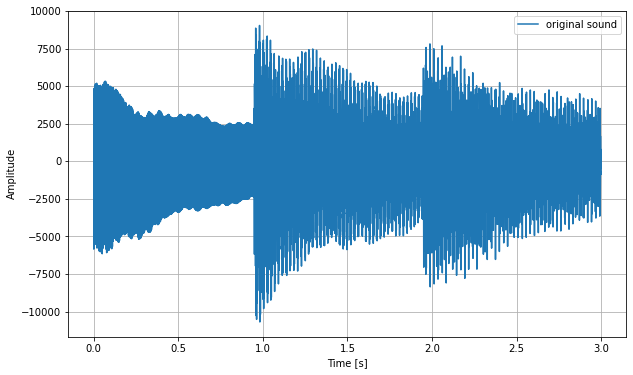

In [4]:
time = np.linspace(0., duration, data.shape[0])

fig = plt.figure(figsize=(10,6))
plt.plot(time, data, label="original sound")

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

## 1.2- Taking and visualizing the fourier transform

---------------------------------------------------------------------------------------------------------------------------
### About the fourier transform graphs:

Here, we take the transform and are looking at graphs so that we can figure out what kind of choices we will make in analyzing and manipulating this data.

Before manipulating, The transform is visualized below. Since the fourier transform returns information about phase and amplitude for a frequency range, we graph amplitudes on the y axis and frequency on the x-axis. Phase information is encoded in the imaginary/real balance of the amplitude information given by the transform. We will talk about this later, but since the magnitude of the amplitude data is preserved regardless of phase, we use np.abs() to get the most information out of the data.

There are a lot of negligable amplitude frequencies on the high end of the spectrum that we can just cut out. This is usually just noise from the surrounding environment and can contribute to a lower quality of the sound that we care about. One frequency like this will not make much of a difference, But when there are a lot combined, all those tiny amplitudes add up and create unnessecary noise.

In the visualized fourier transform, we only graph positive frequencies (just for convenience and just because it is more tangible this way) and we graph the absolute values of the amplitudes, since the fourier transform returns imaginary amplitude values. This is just due to the phase difference between individual waves of certain frequencies, and doesn't have any effect on the total noise. We will talk more about imaginary values, negative frequencies, and keeping these things in mind when doing data analysis in 1.3 below.

---------------------------------------------------------------------------------------------------------------------------
### Normalization:

We use a normalization here of 2/N for this dataset. We will have to undo this when we perform the inverse fourier transform in 1.3

---------------------------------------------------------------------------------------------------------------------------

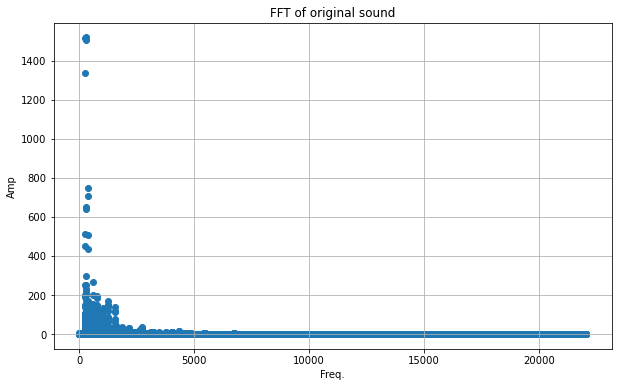

In [5]:
T0 = duration
N = data.shape[0]

dt = T0/N

#taking the transform
dataf = (2/(N))*fft(data)
freq = fftfreq(N,dt)

#visualizing the transform
plt.figure(figsize=(10,6))
plt.scatter(freq[0:N//2], np.abs(dataf[0:N//2]))
plt.xlabel('Freq.')
plt.ylabel('Amp')
plt.title("FFT of original sound")
plt.grid()

### Utility of plots below and importance of visualization before making analytical choices: 

Looking at the above graph, you can see an area with large peaks in amplitude, and an area with all lower amplitudes. The two graphs below are just the same graph, but split along these areas.

The first plot of where the important frequencies are (around 0-2500) gives me an idea of what amplitudes the important frequencies have. Since this is a C minor with three notes, you can pick up the 3 most important peaks just by looking at it. This information is useful because it can tell you what amplitudes make a frequency relevant, or if they should be discarded (amplitude set to 0) in the manipulation.

The plot below of where most of the negligable frequencies live (around 1500-22500) is useful in giving you an idea of what the range of lower amplitude frequencies are.

It is important to visualize and get to know what the data looks like- what you are dealing with in order to be able to make choices about how you are going to proceed with your analysis or operation. In this case- I am going to have to choose  which amplitudes can be considered negligable.

---------------------------------------------------------------------------------------------------------------------------
### How I am choosing which frequencies to set amplitude to 0:

I want to get three different effects using this method, so I am going to choose 3 different amplitudes at which to cut out certain frequencies. In 1.3 below I explain the numbers I chose and how that is going to affect the fft graph after manipulation.

---------------------------------------------------------------------------------------------------------------------------

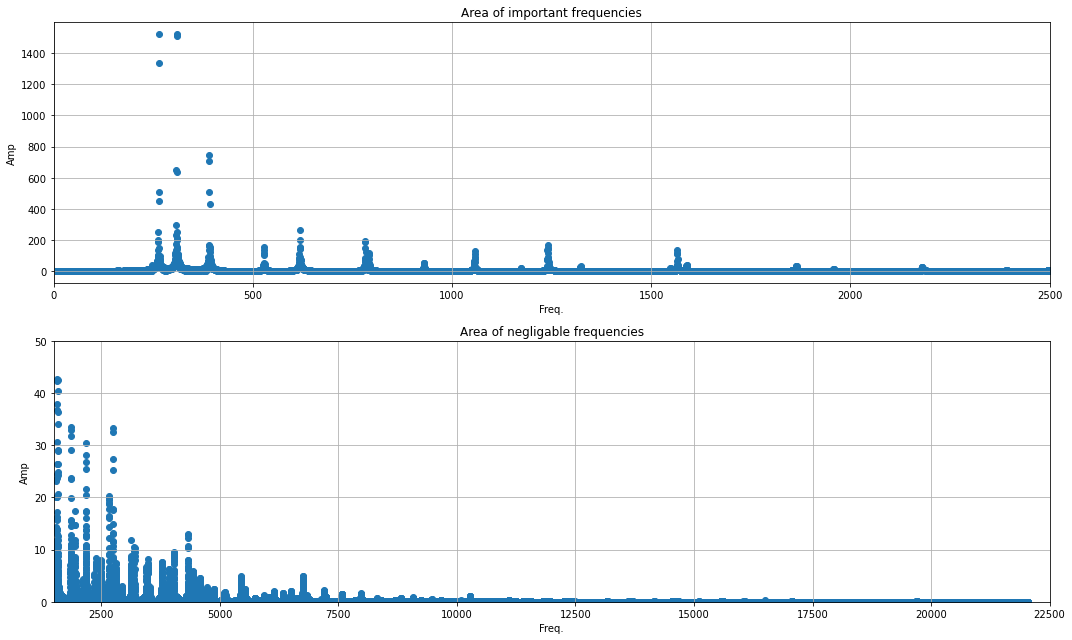

In [6]:
plt.figure(figsize=(15,9))

plt.subplot(2,1,1)

plt.scatter(freq[0:N//2], np.abs(dataf[0:N//2]))
plt.xlabel('Freq.')
plt.ylabel('Amp')
plt.grid()
plt.xlim(0,2500)
plt.title("Area of important frequencies")
#plt.ylim(0,400)

plt.subplot(2,1,2)

plt.scatter(freq[0:N//2], np.abs(dataf[0:N//2]))
plt.xlabel('Freq.')
plt.ylabel('Amp')
plt.grid()
plt.xlim(1500,22500)
plt.ylim(0,50)
plt.title("Area of negligable frequencies")

plt.tight_layout()

(0.0, 100.0)

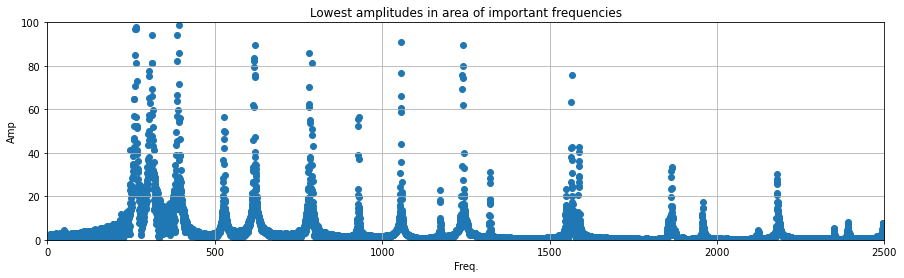

In [7]:
plt.figure(figsize=(15,4))

plt.scatter(freq[0:N//2], np.abs(dataf[0:N//2]))
plt.xlabel('Freq.')
plt.ylabel('Amp')
plt.grid()
plt.xlim(0,2500)
plt.title("Lowest amplitudes in area of important frequencies")
plt.ylim(0,100)

## 1.3- 1st sound effects: getting rid of the frequencies below a certain amplitude

---------------------------------------------------------------------------------------------------------------------------
### Chosen amplitude values:

The goal here is to see how each modified sounds are different based off of how we chose these values.

1st chosen amplitude threshold: 400 (keeping only highest amplitudes - only preserving the 3 main peaks)

2nd chosen amplitude threshold: 20 (keeping most peaks but getting rid of very small peaks)

3rd chosen amplitude threshold: 0.1 (just getting rid of very low amplitudes - preserving all peaks)

--------------------------------------------------------------------------------------------------------------------------
### Discussion- considering negative frequencies, imaginary amplitudes:

As mentioned in 1.2, We need to consider negative frequencies and what to make of imaginary data when doing our manipulations. In regards to negative frequencies, what we do to one side, we need to do to the other. Both sides are going to be relevant when taking the inverse transform and getting a new sound back. 

Consider that the fourier transform returns magnitude and phase.
With the imaginary amplitudes, we need to make sure we are using np.abs() and not np.real(). This is because you lose so much information if you only use the real data. You could do this depending on what your goal is I suppose, but generally if you want to retain the entire nature of the amplitude data, you must look at the absolute value. In this analysis there is no way to control the phase of the original waves relative to one another just looking at the raw data, but if the phase did differ, the absolute value of amplitude data would stay exactly the same. The real part would change however. This is why I use np.abs() below. A comment made on a post here (https://math.stackexchange.com/questions/275115/why-do-fourier-transforms-use-complex-numbers) sums this up well.

I only use np.real() for writing the data into a wav file because this is after the ifft.

---------------------------------------------------------------------------------------------------------------------------

### The function below performs the fft manipulation using 1st method 

In [22]:
def fft_filter1(freq, dataf, threshold, N, filename):
    
    '''
    CREATES FIRST SOUND EFFECT
    
    performs an fft manipulation on input dataf, creating a mask using threshold,
    
    Shows graph of the fft manipulation using freq,
    
    takes the ifft using number of points N,
    
    returns a new modified wav file
    '''
    
    dataf_masked = dataf.copy()
    dataf_masked[np.abs(dataf)<threshold] = 0 #notice the np.abs
    
    #shows which amplitudes have been masked (how the fft was manipulated)
    plt.figure(figsize = (10,6))
    plt.scatter(freq[0:N//2], np.abs(dataf_masked[0:N//2]))
    plt.xlabel('Freq.')
    plt.ylabel('Amp')
    plt.grid()
    plt.xlim(0,5000)
    #plt.ylim(0,50)
    plt.title("fft manipulation using 1st method")
    
    data_clean = ifft(0.5*N*dataf_masked) #notice the reversing of normalization
    
    write(filename, samplerate, np.real(data_clean).astype(np.int16))
    
    return filename
    

### These graphs show how each fft graph looks after the manipulation by the above function

PermissionError: [Errno 13] Permission denied: 'low_amp_filter.wav'

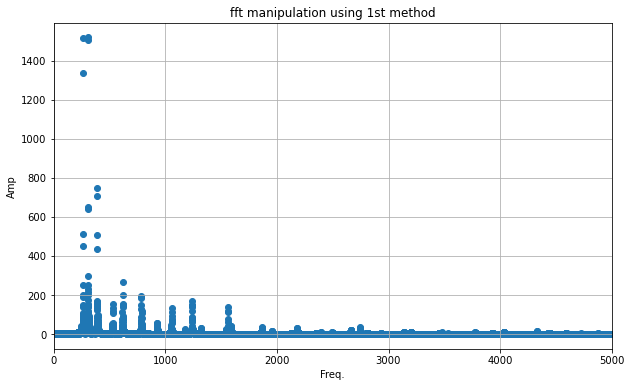

In [23]:
sound1 = fft_filter1(freq, dataf, 0.1, N, "low_amp_filter.wav")

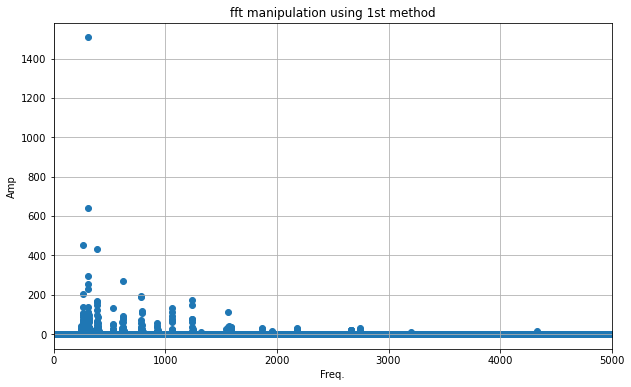

In [10]:
sound2 = fft_filter1(freq, dataf, 10, N, "med_amp_filter.wav")

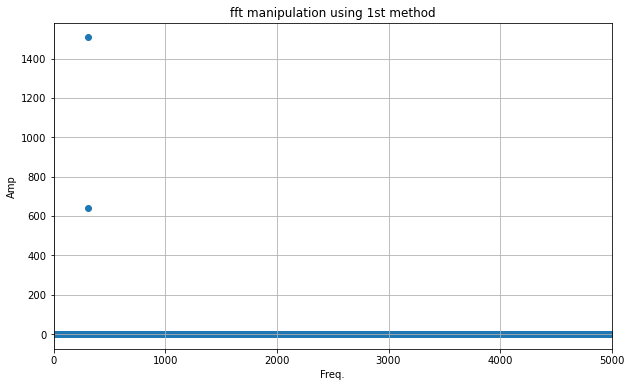

In [11]:
sound3 = fft_filter1(freq, dataf, 400, N, "high_amp_filter.wav")

## 1.4- Hearing the difference
---------------------------------------------------------------------------------------------------------------------------
### The difference between the sounds and why:

As you can hear, the sounds become more and more ethereal sounding as more frequencies get cut out. In the first sound, most of the peaks were preserved so it sounds like the original. In the second one, you can tell by the graph that most high frequency noise got cut out, but you can hear a high pitch ringing, which makes sense considering between 4000-5000 hz, you see a frequency peak that remains there. The last sound, you can hear just the main three notes, and it sounds more uniform than the original sound. This is because the original sound had amplitudes surrounding the main three frequencies and it gave those three notes a stronger and louder "impact", since there were more total amplitudes here. When those were cut out to the extent of the 3rd sound, you don't hear that same impact. Instead, you get three notes and their sustain is uniform as well as a consequence of this.

---------------------------------------------------------------------------------------------------------------------------

In [12]:
playsound(sound1)
playsound(sound2)
playsound(sound3)

# 2. Effects using an experimental FFT method:
# Adding even and odd harmonics
---------------------------------------------------------------------------------------------------------------------------
I started this out wanting to try adding distortion, like you would hear from an amp. I tried getting this effect by adding more noise- more frequencies- and I chose to add harmonics to try and do it. While it did not give me the distortion I wanted, it did create an interesting effect and I did succeed in distorting the noise in a different way.

The youtube video I watched to create this analysis I do below is here: https://www.youtube.com/watch?v=RUpvAdF3M2M 

The pictures below are from the video. The person presenting the information in the video says that even harmonics of a note are comprised of fifths and octaves, which corresponds to frequencies that are $2n$ (where $n=1,2,3,4..$) times the frequency of the base note. Odd harmonics are comprised of thirds and form a dominant 7th chord, and correspond to frequencies that are $2n+1$ times the frequency of the base note.

Below I will be creating these 2 new sounds by adding peaks at these harmonic frequencies.

---------------------------------------------------------------------------------------------------------------------------

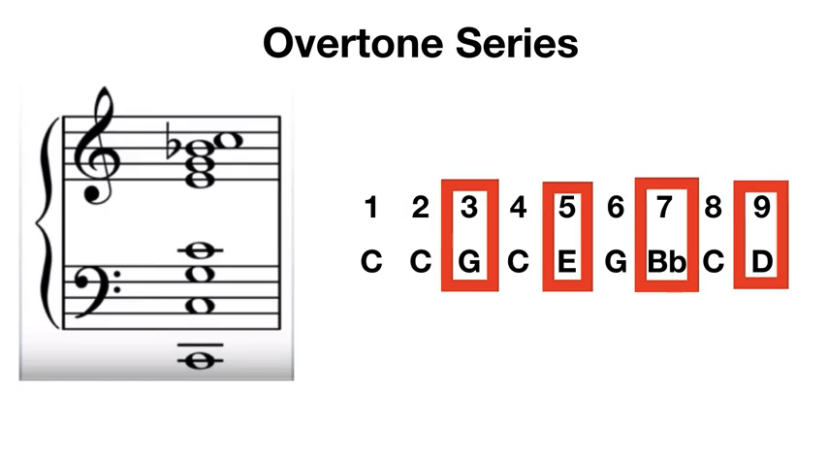

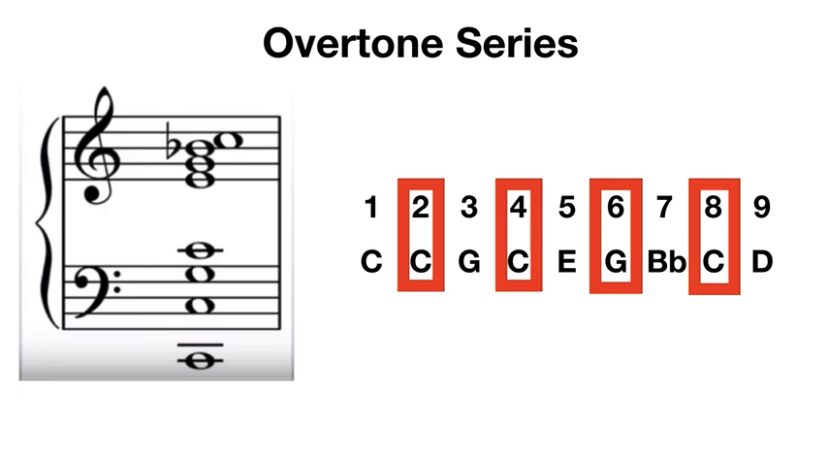

## 2.1 - 2nd sound effect: adding even harmonics
---------------------------------------------------------------------------------------------------------------------------
### Isolating a peak:

Right below you will see that I am snipping out a peak from the original graph. I'm doing this so that I can superimpose this onto the new fft graphs because that is how I will be adding amplitudes to these harmonic frequencies. I think using a real peak will be better than just making that one harmonic frequency have a flat amplitude and nothing else around it.

---------------------------------------------------------------------------------------------------------------------------
### Superimposing the peak onto the fft graph:

I do this by figuring what index in the "peak" array has the maximum value. We remember that even harmonics occurs at $2n$ times the base frequency. For each n = 1,2,3.. I loop over 6 iterations of harmonics and add the peak to the graph, keeping in mind that the "peak" array does have 511 points in it, and the maximum value happens at index 217. Therefore, I start superimposing the peak array 217 points before where the frequency of the harmonic occurs, so that the maximum of the peak will happen at the frequency and not 217 points after it. I make sure to have a "scale" array that just scales the peaks so that their magnitudes wane with each $n$ step. This makes for a more realistic harmonic pattern.

---------------------------------------------------------------------------------------------------------------------------

### Here is where I isolate the peak, I store this short piece of data in an array "peak"

511
(183.74071438002153+26.012106313932453j)
(array([217], dtype=int64),)


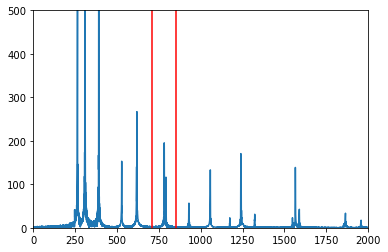

In [13]:
dataf_copy = dataf.copy()
dataf_copy1 = dataf.copy()

plt.plot(freq[0:N//2], np.abs(dataf[0:N//2]))
plt.xlim(0,2000)
plt.ylim(0,500)
plt.axvline(710, color = "red")
plt.axvline(850, color = "red")

dataf_copy[freq>880] = 0
dataf_copy[freq<710] = 0

boolean = dataf_copy != 0
peak = dataf[boolean]

print(len(peak)) #peak is the isolated array. At each harmonic frequency, we will superimpose this peak.

#the maximum value here is at index maxindex, which is 217 in the peak array.
#this is important because the peak array will be at its greatest at the harmonic frequency.
maxval = np.max(peak)
print(maxval)
maxindex = np.where(peak == maxval) 
print(maxindex)

### This is the loop mentioned above.

Notice here that I set up the "odd" values for the section after this one.

In [14]:
even = [2,4,6,8,10,12]
odd = [3,5,7,9,11,13]
scale = [1,0.5,0.35,0.25,0.15,0.05] #will make sure each successive harmony is more and more diminished

dataf_even = dataf.copy()
dataf_odd = dataf.copy()

maxval_basenote = np.max(np.abs(dataf[0:N//2]))
maxindex_basenote = np.where(np.abs(dataf[0:N//2]) == maxval_basenote)

for i in range(len(even)):
    
    #establishing index of where the harmonic is going to be added in the original graph
    index = maxindex_basenote[0]*even[i]
    
    #this is where we start adding the peak to original graph
    start_index = index - maxindex
    
    for j in range(len(peak)):
        dataf_even[start_index+j] = 2.5*scale[i]*peak[j]

### Here, we keep in mind that we only modified for the positive frequencies.
---------------------------------------------------------------------------------------------------------------------------
If we want to really do a complete fft manipulation, both sides should match. As we talked about above, the ifft will take both sides into account when transforming the data back into something we can turn into sound. I do this by reflecting the positive side, and then using np.concatenate to smush the positive side and negative side together to make a perfectly reflected fft graph.

I plot what we had before, and then this concatenated graph to show that both sides are now even.

--------------------------------------------------------------------------------------------------------------------------

(-5000.0, 5000.0)

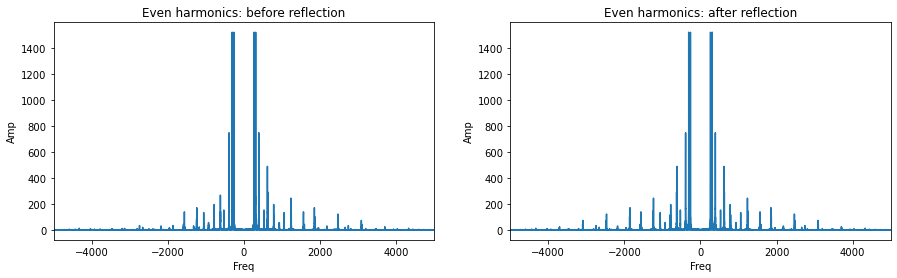

In [15]:
#we only modified the positive side... we must remember that the negative frequencies are also 
#important to include in the fourier transform, and it will be needed for the ifft
#so...reversing the order - we want a reflected side using np.flip
poshalf = dataf_even[0:N//2]
copy = poshalf.copy()
neghalf = np.flip(copy)

#now both sides will match
neweven = np.concatenate((poshalf,neghalf), axis = 0)

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(freq, np.abs(dataf_even))
plt.title("Even harmonics: before reflection")
plt.xlabel("Freq")
plt.ylabel("Amp")
plt.xlim(-5000,5000)

plt.subplot(1,2,2)
plt.plot(freq, np.abs(neweven))
plt.title("Even harmonics: after reflection")
plt.xlabel("Freq")
plt.ylabel("Amp")
plt.xlim(-5000,5000)
#reversing the order- we want a reflected side

In [16]:
data_even = ifft(0.5*N*neweven) #notice the reversing of normalization
    
write("evenharmonics_Cm.wav", samplerate, np.real(data_even).astype(np.int16))

## 2.2 - 3rd sound effect: adding odd harmonics
---------------------------------------------------------------------------------------------------------------------------

This will use the same exact process as above.

---------------------------------------------------------------------------------------------------------------------------

In [17]:
for k in range(len(odd)):
    
    #establishing index of where the harmonic is going to be added in the original graph
    index = maxindex_basenote[0]*odd[k]
    
    #this is where we start adding the peak to original graph
    start_index = index - maxindex
    
    for m in range(len(peak)):
        dataf_odd[start_index+m] = 2.5*scale[k]*peak[m]


(-5000.0, 5000.0)

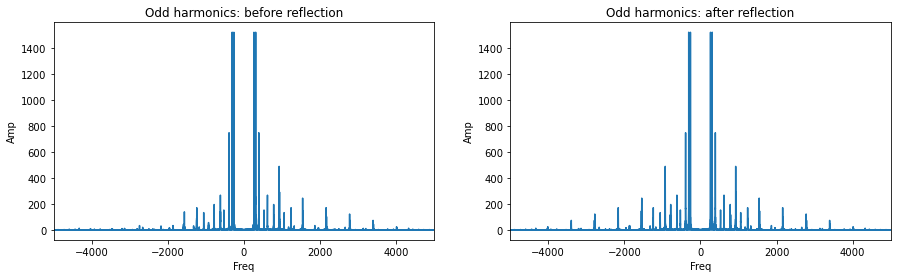

In [18]:
#we only modified the positive side... we must remember that the negative frequencies are also 
#important to include in the fourier transform, and it will be needed for the ifft
#so...reversing the order - we want a reflected side using np.flip
poshalf = dataf_odd[0:N//2]
copy = poshalf.copy()
neghalf = np.flip(copy)

#now both sides will match
newodd = np.concatenate((poshalf,neghalf), axis = 0)

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(freq, np.abs(dataf_odd))
plt.title("Odd harmonics: before reflection")
plt.xlabel("Freq")
plt.ylabel("Amp")
plt.xlim(-5000,5000)

plt.subplot(1,2,2)
plt.plot(freq, np.abs(newodd))
plt.title("Odd harmonics: after reflection")
plt.xlabel("Freq")
plt.ylabel("Amp")
plt.xlim(-5000,5000)
#plt.xlim()
#reversing the order- we want a reflected side

In [19]:
data_odd = ifft(0.5*N*newodd) #notice the reversing of normalization
    
write("oddharmonics_Cm.wav", samplerate, np.real(data_odd).astype(np.int16))

## 2.3- Hearing the difference
---------------------------------------------------------------------------------------------------------------------------
Here you can definitely hear that more frequencies are added to the base note, and you can hear that relative to the C, you can also here the 5th in the even harmonics sound vs. the 3rd in the odd harmonics sound.

Aside from the harmonics, you can also hear the last two notes in the C minor chord still, but it is now two notes among many.

---------------------------------------------------------------------------------------------------------------------------

In [20]:
playsound("evenharmonics_Cm.wav")

In [21]:
playsound("oddharmonics_Cm.wav")

# 3. Conclusion
---------------------------------------------------------------------------------------------------------------------------

There are many types of sound effects you can do using fft's. In the first section when I used the first method and made three different sounds from it using 3 different parameters, You could hear exactly how the sound effect progressed as I increased the amplitude threshold for each. The sound became more uniform and the sustains more extended, and more uniform as well. I say uniform in terms of having a more uniform amplitude. In the second section, I realized I could not create distortion using the method of adding harmonics in the way that I did. This manipulation did distort the sound but I think that for distortion in the sense that I was first talking about, it would just be easier to add noise directly onto the original graph.

During this project I found that making different sound effects can be done in so many different ways, and that you can get different levels of the effect using the same fft manipulation method. It showed me some effects may just be better done without fft manipulations.

---------------------------------------------------------------------------------------------------------------------------
